In [47]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Problem statement

To Predict chatges in medical insurance

## Data Gathering

In [3]:
df = pd.read_csv('medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 1. sex column

In [7]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [8]:
df['sex'].replace({'female':1, 'male':0}, inplace=True)

In [9]:
sex_value = {'female':1, 'male':0}

#### 2.smoker column

In [10]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [11]:
df['smoker'].replace({'yes': 0, 'no':1}, inplace=True)

In [12]:
df['smoker']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    1
1335    1
1336    1
1337    0
Name: smoker, Length: 1338, dtype: int64

In [13]:
smoker_value = {'yes': 0, 'no':1} 

#### 3.region

In [14]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [15]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
#  Use one hot encoding
df = pd.get_dummies(df, columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,0,0,0,1
1,18,0,33.770,1,1,1725.55230,0,0,1,0
2,28,0,33.000,3,1,4449.46200,0,0,1,0
3,33,0,22.705,0,1,21984.47061,0,1,0,0
4,32,0,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830,0,1,0,0
1334,18,1,31.920,0,1,2205.98080,1,0,0,0
1335,18,1,36.850,0,1,1629.83350,0,0,1,0
1336,21,1,25.800,0,1,2007.94500,0,0,0,1


In [17]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,0,0,0,1
1,18,0,33.770,1,1,1725.55230,0,0,1,0
2,28,0,33.000,3,1,4449.46200,0,0,1,0
3,33,0,22.705,0,1,21984.47061,0,1,0,0
4,32,0,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830,0,1,0,0
1334,18,1,31.920,0,1,2205.98080,1,0,0,0
1335,18,1,36.850,0,1,1629.83350,0,0,1,0
1336,21,1,25.800,0,1,2007.94500,0,0,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


## Feature engineering

<AxesSubplot: >

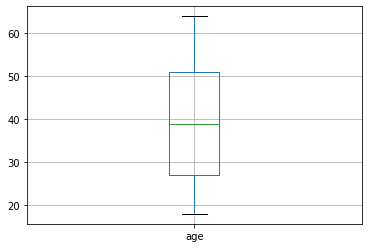

In [19]:
#age
df[['age']].boxplot()

<AxesSubplot: >

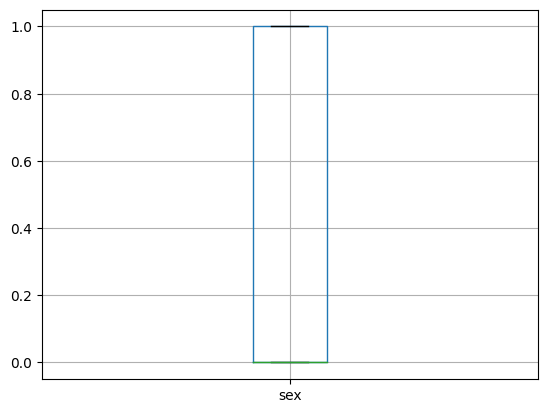

In [20]:
# sex
df[['sex']].boxplot()

<AxesSubplot: >

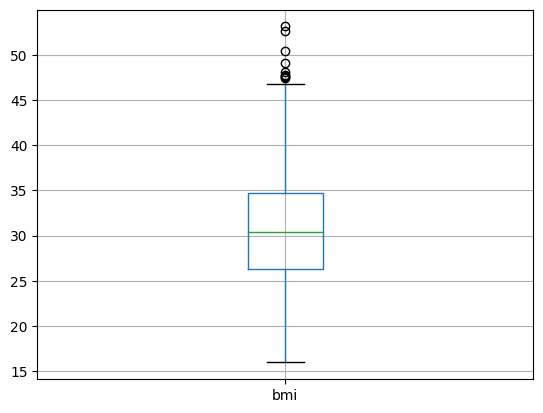

In [21]:
# bmi

df[['bmi']].boxplot()

In [22]:
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.50)
q3 = df['bmi'].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5*IQR
lower_tail = q1 - 1.5*IQR

print('Q1 -->',q1)
print('Q2 -->',q2)
print('Q3 -->',q3)

print('Upper Tail',upper_tail)
print('lower Tail',lower_tail)

Q1 --> 26.29625
Q2 --> 30.4
Q3 --> 34.69375
Upper Tail 47.290000000000006
lower Tail 13.7


In [23]:
df[['bmi']].loc[df['bmi'] > upper_tail].shape

(9, 1)

In [24]:
df[['bmi']].loc[df['bmi'] < lower_tail].shape

(0, 1)

In [25]:
df['bmi'].mean()

30.66339686098655

In [26]:
df['bmi'].median()

30.4

In [27]:
mean_bmi = df[['bmi']].mean()[0]
mean_bmi

30.66339686098655

In [28]:
df.loc[df['bmi'] > upper_tail, 'bmi'] = mean_bmi

In [29]:
df[['bmi']].loc[df['bmi'] > upper_tail].shape

(0, 1)

<AxesSubplot: >

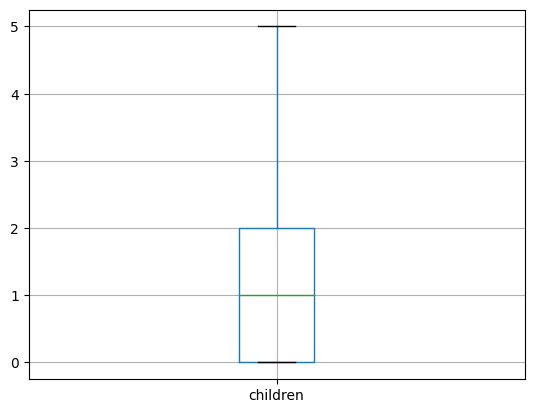

In [30]:
#  children
df[['children']].boxplot()

<AxesSubplot: >

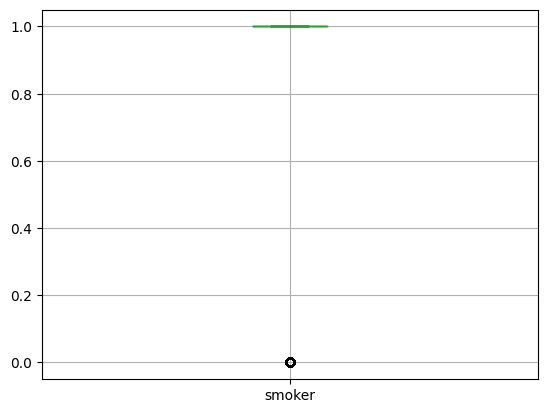

In [31]:
# smoker
df[['smoker']].boxplot()

## Feature Selection

In [32]:
# Linearity

df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.114287,0.042469,0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.039870,-0.017163,0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.114287,-0.039870,1.000000,0.017306,0.002811,0.190853,-0.135946,-0.128540,0.254149,0.000606
children,0.042469,-0.017163,0.017306,1.000000,-0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,0.025019,0.076185,0.002811,-0.007673,1.000000,-0.787251,-0.002811,0.036945,-0.068498,0.036945
charges,0.299008,-0.057292,0.190853,0.067998,-0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.135946,-0.022808,-0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.128540,0.024806,0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.254149,-0.023066,-0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,0.000606,0.021914,0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot: >

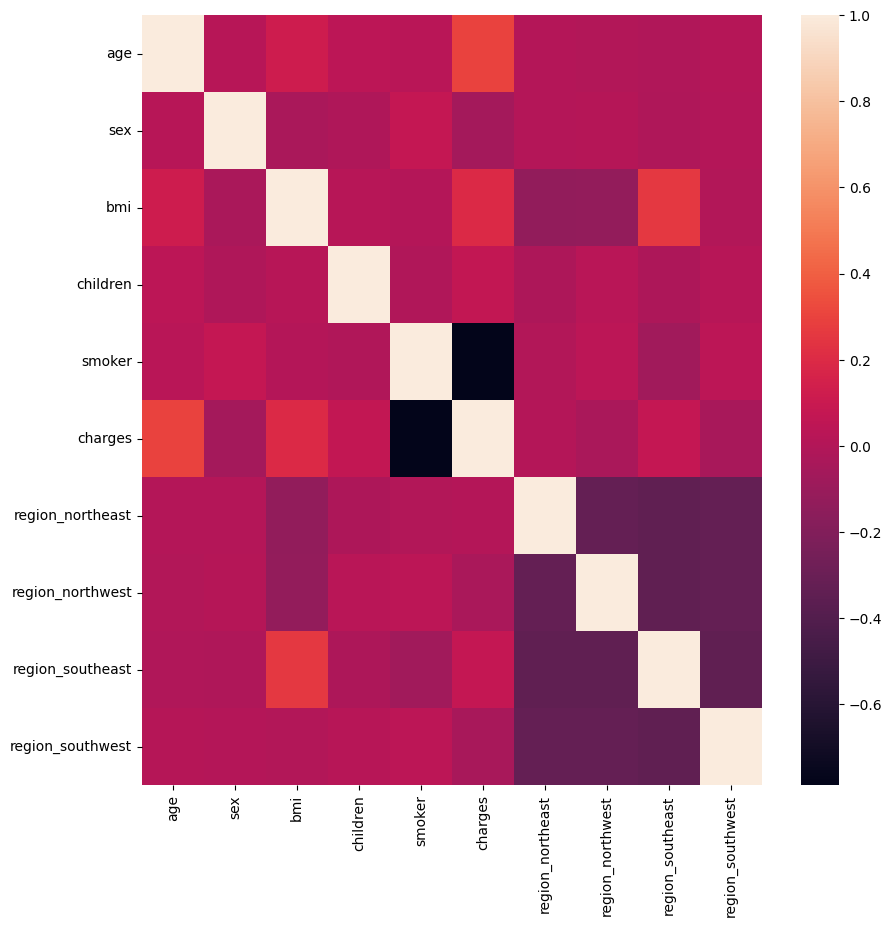

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [34]:
df1 = df.drop('charges',axis=1)
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [35]:
vif_list = []

for i in range(df1.shape[1]):
    
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index=df1.columns)
s1

age                  1.017820
sex                  1.008347
bmi                  1.097928
children             1.004136
smoker               1.012252
region_northeast     9.698300
region_northwest     9.852745
region_southeast    12.562245
region_southwest    10.437913
dtype: float64

<AxesSubplot: >

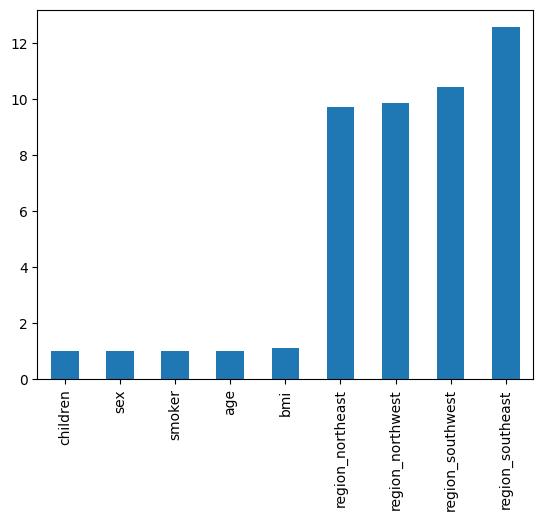

In [36]:
s1.sort_values().plot(kind='bar')

## Train Test Split

In [37]:
x = df.drop('charges', axis=1)
y = df['charges']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


In [39]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
216,53,1,26.600,0,1,0,1,0,0
731,53,0,21.400,1,1,0,0,0,1
866,18,0,37.290,0,1,0,0,1,0
202,60,1,24.035,0,1,0,1,0,0
820,45,0,33.700,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
715,60,0,28.900,0,1,0,0,0,1
905,26,1,29.355,2,1,1,0,0,0
1096,51,1,34.960,2,0,1,0,0,0
235,40,1,22.220,2,0,0,0,1,0


## Model training

In [40]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [41]:
# Testing Dataset

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print('Mean Squared Error -->',mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error -->',rmse)

mae = mean_absolute_error(y_test , y_pred)
print('Mean Absolute Error -->',mae)

r2 = r2_score(y_test , y_pred)
print('R Squared Error',r2)

Mean Squared Error --> 35302360.83966698
Root Mean Squared Error --> 5941.578985393275
Mean Absolute Error --> 4040.968045829474
R Squared Error 0.7635168168366739


In [42]:
# Training Dataset
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print('Mean Squared Error -->',mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error -->',rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print('Mean Absolute Error -->',mae)

r2 = r2_score(y_train , y_pred_train)
print('R Squared Error',r2)

Mean Squared Error --> 37100224.04548722
Root Mean Squared Error --> 6090.995324697534
Mean Absolute Error --> 4162.984823194361
R Squared Error 0.7456256622324378


#### Normality

In [43]:
Residual = y_train - y_pred_train

<AxesSubplot: xlabel='charges', ylabel='Density'>

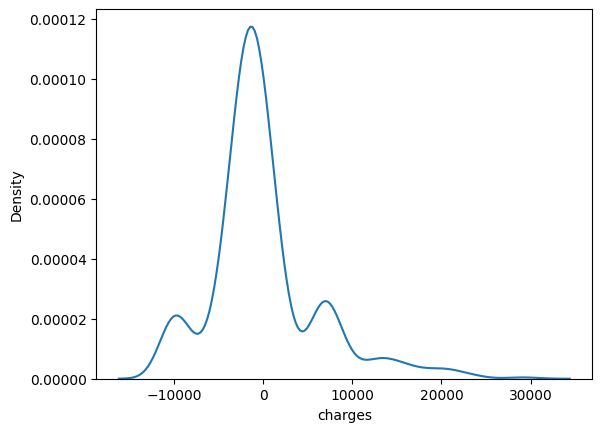

In [44]:
sns.kdeplot(Residual)

#### Homoscadasticity

## Testing on Single Row

In [54]:
column_name = x.columns
print('Len -- >',len(column_name))
column_name

Len -- > 9


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [55]:
df.head(5)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,0,0,0,1
1,18,0,33.770,1,1,1725.55230,0,0,1,0
2,28,0,33.000,3,1,4449.46200,0,0,1,0
3,33,0,22.705,0,1,21984.47061,0,1,0,0
4,32,0,28.880,0,1,3866.85520,0,1,0,0


In [56]:
#  User input
age = 19.000
sex = "male"
bmi = 27.900
children = 0.000
smoker = "yes"
region = 'southwest'

# charges = ?

In [57]:
sex_value  # sex_dict (label encoding)

{'female': 1, 'male': 0}

In [58]:
smoker_value  # smoker dict (label encoding)

{'yes': 0, 'no': 1}

In [59]:
column_name

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [60]:
json_data = {"sex":sex_value, "smoker":smoker_value, "columns":list(column_name)}
json_data

{'sex': {'female': 1, 'male': 0},
 'smoker': {'yes': 0, 'no': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [61]:
#  (one hot encoding)
region = "region_" + region
region
region_index = np.where(column_name == region)[0][0]
region_index

8

In [62]:
array = np.zeros(x.shape[1])
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [63]:
array[0] = age
array[1] = json_data['sex'][sex]
array[2] = bmi
array[3] = children
array[4] = json_data['smoker'][smoker]
array[region_index] = 1
print(array)

[19.   0.  27.9  0.   0.   0.   0.   0.   1. ]


In [64]:
predicted_price = np.around(model.predict([array]),2)    # 2 D
print(f"Predict charges for medical insurance --> {predicted_price} /- Rs.")

Predict charges for medical insurance --> [25290.41] /- Rs.


In [65]:
#  Create Pickle file
import pickle

with open('Linear_Model.pkl','wb') as f:
    pickle.dump(model,f)

In [66]:
#  Create jsON file
import json
with open('json_data.json','w') as f:
    json.dump(json_data,f)